In [6]:

#<<<<<<<<<<<<<<<<<<<<#          Simulacion RS        #>>>>>>>>>>>>>>>>>>>># V 1.0


import random, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pandas import Series, DataFrame
#pd.options.mode.chained_assignment = None 


TamañoDeLaMuestra = 500 # Cantidad de sujetos que quiero en la muestra.
QOpinionesExpuestas = 5 #Cantidad de opiniones que quiero que vea cada agente
QVecesMuestroOpinion = 5 # Cantidad de veces maxima que se muestra una opinion

In [30]:

# Defino a los agentes.

class Person (object):
    def __init__ (self, opinion,ID):
        self.Oi = opinion
        self.ID = ID # Genero un ID para cada agente
        self.IdeasVistas = [] # Me va a servir para almacenar las ideas a las que haya estado expuesto el sujeto
        self.IdeasVotadas = [] # Almaceno las ideas que voto

    
    def __str__ (self):
        try:
            devolver = 'despues defino que quiero que me devuelva'
            return devolver
        except:
            devolver = 'despues defino que quiero que me devuelva'
            return devolver
    
    def set_Oi (self, opinion):
        self.Oi = opinion
    
    def append_IdeasVistas (self, IdeaVista):
        self.IdeasVistas.append (IdeaVista)

    def append_IdeasVotadas (self, IdeaVotada):
        self.IdeasVotadas.append (IdeaVotada)           

    def votar (self, ideas):
        Comp = 3
        vota = 0
        for i in ideas.index:
            V = abs(ideas.at[i,'Opinion']-self.Oi)
            if V == Comp:
                vota = random.randint (i, vota)
            elif V < Comp:
                vota = i
                Comp = V
        return vota # Me devuelve la id de la idea a votar     
    
    def comparar (self, idea):
        Distancia = abs(idea-self.Oi)
        return Distancia
    
    def get_Oi (self):
        return self.Oi
    
    def get_IdeasVistas (self):
        return self.IdeasVistas

    def get_ID (self):
        return self.ID
    
    def clean_IdeasVistas (self):
        self.IdeasVistas = []
    
    


In [31]:

# Creo la muestra
Muestra_Completa = {}
for i in range (1,TamañoDeLaMuestra):
    Muestra_Completa [i] = Person (np.random.uniform (-1,1),i*111)


<ipython-input-48-a5676725ad12>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OpinionesFiltradas.sort_values(by=['Vistas'], inplace=True)


     Sujeto Opinion Sujeto ID Idea Mostrada Idea Mostrada  \
0       111      -0.769862                0      0.058614   
1       222      -0.769862                1     -0.529882   
2       333      -0.769862                2      0.151919   
3       444      -0.769862                3      0.555876   
4       555      -0.769862                4     -0.401731   
...     ...            ...              ...           ...   
2465  55278       0.148769              498      0.831082   
2466  55167       0.148769              497      0.027848   
2467  55056       0.148769              496     -0.993792   
2468  54945       0.148769              495      0.460447   
2469  53724       0.148769              484      0.363131   

     Otras opiniones que vio   Voto Distancia  
0               [1, 2, 3, 4]  False  0.828475  
1               [0, 2, 3, 4]   True  0.239979  
2               [0, 1, 3, 4]  False  0.921781  
3               [0, 1, 2, 4]  False  1.325738  
4               [0, 1, 2, 3

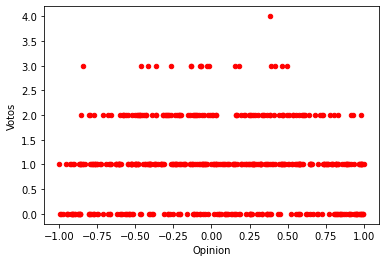

In [48]:

#¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤ Simulacion Basica ¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤#

Muestra_Simulacion = Muestra_Completa.copy()
DataSave = pd.DataFrame(columns=['ID', 'Opinion', 'Votos', 'Vistas'])
MinutoAMinuto = pd.DataFrame(columns=['Sujeto', 'Opinion Sujeto', 'ID Idea Mostrada', 'Idea Mostrada', 'Otras opiniones que vio', 'Voto', 'Distancia'])
OpinanNoVotan = 0
TiempoSimulacion = 0

for i in Muestra_Simulacion:
    ParticipanteActual = i
    if OpinanNoVotan < QOpinionesExpuestas:
        DataSave.at [OpinanNoVotan,'ID'] = Muestra_Simulacion.get(i).get_ID()
        DataSave.at [OpinanNoVotan,'Opinion'] = Muestra_Simulacion.get(i).get_Oi()
        DataSave.at [OpinanNoVotan,'Votos'] = 0
        DataSave.at [OpinanNoVotan,'Vistas'] = 0
        OpinanNoVotan +=1
    else:
        OpinionesFiltradas = DataSave[DataSave.Vistas < QVecesMuestroOpinion]
        OpinionesFiltradas.sort_values(by=['Vistas'], inplace=True)
        OpinionesParaVotar = OpinionesFiltradas.iloc[:QOpinionesExpuestas, :2]
        Muestra_Simulacion.get(i).append_IdeasVistas (OpinionesParaVotar)
        DataSave.at [i,'ID'] = Muestra_Simulacion.get(i).get_ID()
        DataSave.at [i,'Opinion'] = Muestra_Simulacion.get(i).get_Oi()
        DataSave.at [i,'Votos'] = 0
        DataSave.at [i,'Vistas'] = 0
        VotoActual = Muestra_Simulacion.get(i).votar(OpinionesParaVotar)
        DataSave.at [VotoActual,'Votos'] = DataSave.at [VotoActual,'Votos'] + 1
        for i in OpinionesParaVotar.index:
            DataSave.at [i,'Vistas'] = DataSave.at [i,'Vistas'] + 1
            MinutoAMinuto.at [TiempoSimulacion,'Sujeto'] = OpinionesParaVotar.at [i,'ID']
            MinutoAMinuto.at [TiempoSimulacion,'Opinion Sujeto'] = Muestra_Simulacion.get(ParticipanteActual).get_Oi()
            MinutoAMinuto.at [TiempoSimulacion,'ID Idea Mostrada'] = i
            MinutoAMinuto.at [TiempoSimulacion,'Idea Mostrada'] = OpinionesParaVotar.at [i,'Opinion']
            CopiaOpiniones = OpinionesParaVotar.index.tolist()
            CopiaOpiniones.remove(i)
            MinutoAMinuto.at [TiempoSimulacion,'Otras opiniones que vio'] = CopiaOpiniones
            if (DataSave.at [VotoActual,'ID']) == (OpinionesParaVotar.at [i,'ID']):
                MinutoAMinuto.at [TiempoSimulacion,'Voto'] = True
            else:
                MinutoAMinuto.at [TiempoSimulacion,'Voto'] = False
            MinutoAMinuto.at [TiempoSimulacion,'Distancia'] = Muestra_Simulacion.get(ParticipanteActual).comparar(OpinionesParaVotar.at [i,'Opinion'])
            TiempoSimulacion +=1           

print (MinutoAMinuto)
print (DataSave.sort_values(by=['Votos'], ascending=False))

Grafico = DataSave[DataSave.Votos < 10]

Grafico.plot(kind='scatter',x='Opinion',y='Votos',color='red')
#plt.yticks(range(5))
plt.show()